#Lecture 6.2: Training a Factorization Machine
##What you'll learn in this session
1.  Reduce Rendel's equations to code
2.  Use what you've learned to improve performance
3.  How to adapt the technique for different types of prediction problems

##Order of topics
1.  Walk through code and compare to Rendle's paper
2.  Develop equations for least squares regression
3.  Adding L2 penalty to problem statement
4.  Checking code for correctness
5.  Initialization
6.  Modifying equations for different problem types.  

##Pre-reading
http://www.ismll.uni-hildesheim.de/pub/pdfs/Rendle2010FM.pdf - #Rendle's original paper

##Code Walk-through
The code in the code section below encapsulates Rendles equations 1 through 4.  A good place to start is the function "predict".  That shows python numpy code for generating predictions given the various matrix quantities in Rendles equation 1.  Equation 1 has four basic quantities - a scalar bias ($w_0$), a vector of linear weights ($w_1$ through $w_n$), factor matrix ($v$) and an attribute vectore ($x_1$ through $x_n$).  In the code the notations for the scalar bias is changed from $w_0$ to b.  Other than that the variable names in the code match those in the paper.  The code develops three scalar quantities whose sum constitutes the prediction - one quantity for each of the expressions in Rendle's equation 1.  The first is just the bias values b.  The second is denoted as $a_2$ and the third as $a_3$.  The quantity a2 is the linear term and is simply the dot product of the weight array w with the array of attributes x.  The quantity a3 is the quadratic term and involves the vectors that the paper denotes as $v_i$ in bold letters.  These vectors form the rows of a matrix denoted as bold V (upper case).  The sum involving the attribute vector is equivalent to a quadratic form involving the attribute vector x and a matrix $M = VV^T$.  The tricky bit is that the sum is only over the upper triangle of M.  It doesn't include the diagonal.  In the math for Lemma 3.1, Rendle shows that the third sum in equation 3, is equivalent to forming the quadratic form $x^TVV^Tx$, subtracting the diagonal contribution and then dividing by two.  You'll see that in the code.  First $VV^T$ is formed and then the diagonal elements are set to zero (instead of substracting them after the multiplication).  Then the quadratic form is evaluated and multiplied by a half.  

The function named "grad" implements equation 4 from the paper.  The gradients with respect to the bias term and the linear term are straightforward.  The implementation of the gradient with respect to the matrix V follows equation 4 except that it builds the matrix a row at a time whereas the equation in the paper is for single elements from V.  There is also a numerical version of the gradient function in order to check calculations.  The numerical gradient is a time consuming way to do the calculation, but the computation is a very straightforward implementation of the definition of a gradient so it's easy to check visually.

##In class exercises
1  The code for predict and grad define how predictions are made and the gradient of the predictions, but gradient descent needs the gradient of some performance measure with respect to the parameters (b, w and V in this case).  Suppose that the problem being solved is a regression problem and that the performance measure is mean squared error or a training set or test set.  Call the prediction function $P(b, w, V, x)$.  Write the expression for the performance over a set of examples and the gradient of the performance in terms of the gradient of $P$.  

2  How would your answer in the exercise above change if you chose to minimize mean absolute error instead of mean squared error?

3  The matrix V introduces a large number of free parameters into the solution.  It is likely that some sort of regularization will be required to avoid overfitting.  L2 is the easiest type of regularization to append to the problem.  To see why, write an expression for the L2 penalty of an array of weights and then take its gradient in symbolic form.  If you wanted to add an L2 penalty, what would you add to the gradient of the performance measure?  

4  Run the code below and adjust the parameters to improve the performance. 

In [33]:
__author__ = 'mike-bowles'
import urllib2
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def predict(b, w, v, x): #b=scalar, w=np.array, v=np 2-dim array
    # dimensions
    # dim(x) = nAtt
    # dim(b) = python float
    # dim(w) = nAtt
    # dim(v) = nAtt x nDim
    # function return = nRow x 1
    a2 = np.dot(w, x)
    M = np.dot(v, np.transpose(v))
    i,j = np.indices(M.shape)
    M[i==j] = 0.0 # set diagonal elements to zero
                  # alternative, zero out the lower (or upper) triangle and diagonal 
    a3 = 0.5 * np.dot(x, np.dot(M, x))
    return b + a2 + a3

In [35]:
def grad(b, w, v, x):
    #x is single row from data in array form (not single column matrix
    #call of the form grad(,,,X[i,:])
    bGrad = 1.0
    wGrad = np.array(x)
    vGrad = np.zeros_like(v)
    vSum = np.zeros_like(v[1, :])
    for j in range(len(x)):
        vSum += v[j, :] * x[j]
    for i in range(len(x)):
        vGrad[i, :] = x[i] * vSum - v[i, :] * x[i] * x[i]
    return bGrad, wGrad, vGrad

In [36]:
__author__ = 'mike.bowles'
import matplotlib.pyplot as plot
import math
%matplotlib inline
#define a two-dimensional optimization problem
#quadratic form in w1, w2




def ada_delta(b, w, v, x, gradient):
   
    #initialize weights
    w1 = 1.0
    w2 = 1.0
    w3 = 1.0

    #initialize smoothed squared gradients
    smSqg1 = 0.0
    smSqg2 = 0.0
    smSqg3 = 0.0

    #initialize smoothed squared dw's
    smSqdw1 = 0.0
    smSqdw2 = 0.0
    smSqdw3 = 0.0

    #set meta parameters
    nSteps = 10
    rho = 0.9
    eps = 1e-3
        #update steps

    
    smSqg1 = rho * smSqg1 + (1 - rho) * gradient[0] * gradient[0]
    smSqg2 = rho * smSqg2 + (1 - rho) * gradient[1] * gradient[1]
    smSqg3 = rho * smSqg3 + (1 - rho) * gradient[2] * gradient[2]
    #weight increments
    dw1 = - np.sqrt(smSqdw1 + eps) * gradient[0] / np.sqrt(smSqg1 + eps)
    dw2 = - np.sqrt(smSqdw2 + eps) * gradient[1] / np.sqrt(smSqg2 + eps)
    dw3 = - np.sqrt(smSqdw3 + eps) * gradient[2] / np.sqrt(smSqg3 + eps)
    
    smSqdw1 = rho * smSqdw1 + (1 - rho) * dw1 * dw1
    smSqdw2 = rho * smSqdw2 + (1 - rho) * dw2 * dw2
    smSqdw3 = rho * smSqdw3 + (1 - rho) * dw3 * dw3
    
    w1 += dw1
    w2 += dw2
    w3 += dw3
    return w1, w2, w3 

In [37]:
def gradNum(b, w, v, x):
    eps = max(b * 1e-4, 1e-6)
    pr = predict(b, w, v, x)
    pbPlus = predict(b + eps, w, v, x)
    bGrad = (pbPlus - pr) / eps
    wGrad = np.zeros_like(w)
    for i in range(len(w)):
        eps = max(w[i] * 1e-4, 1e-6)
        wPlus = np.array(w)
        wPlus[i] = w[i] + eps
        pwPlus = predict(b, wPlus, v, x)
        wGrad[i] = (pwPlus - pr) / eps
    (vi, vj) = v.shape
    vGrad = np.zeros_like(v)
    for i in range(vi):
        for j in range(vj):
            eps = max(v[i,j] * 1e-4, 1e-6)
            vPlus = np.array(v)
            vPlus[i, j] = v[i,j] + eps
            pvPlus = predict(b, w, vPlus, x)
            vGrad[i,j] = (pvPlus - pr) / eps
    return bGrad, wGrad, vGrad

####Read and Format Data

In [38]:
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib2.urlopen(target_url)
x = []
y = []
names = []
firstLine = True

for row in data:
    if firstLine:
        names = row.strip().split(";")
        firstLine = False
    else:
        rowSplit = row.strip().split(";")
        y.append(float(rowSplit.pop()))

        floatRow = [float(num) for num in rowSplit]
        x.append(floatRow)

# training and test sets
indices = range(len(x))
xTe = [x[i] for i in indices if i%2 == 0 ]
xTr = [x[i] for i in indices if i%2 != 0 ]
yTe = [y[i] for i in indices if i%2 == 0]
yTr = [y[i] for i in indices if i%2 != 0]

xTe = np.array(xTe); xTr = np.array(xTr); yTe = np.array(yTe); yTr = np.array(yTr)

#### meta parameters

In [43]:
nDim = 5          # dimension of abstract factor space
lam1 = 0.0001      # multiplier for L1 penalty on linear weight vector w
lam2 = 0.0001        # multiplier for L1 penalty on cross-product terms v
nPasses = 600     # number of passes through gradient descent calculations
gradTest = False  # test gradient calculation against numerical gradient?
gradStep = 0.0001 # step size for gradient descent.

#### some setup and initialization

In [53]:
rowTr, nAtt = xTr.shape
rowTe, nAtt = xTe.shape
vSize = nDim * nAtt
wSize = nAtt
# explore alternative v initiazations
v = np.random.normal(0.0, 1.0 / float(vSize), (len(xTr[0, :]), nDim))
# v = np.zeros((len(xTr[0, :]), nDim))
b = 0.0
# w = np.random.normal(0.0, 1.0 / float(wSize), (len(xTr[0, :])))
w = np.zeros_like(xTr[0, :])

####Train and Test

In [54]:
print 'Training Error     Test Error'
test_error = []
train_error = []

# #initialize weights
# w1 = 1.0
# w2 = 1.0
# w3 = 1.0

# #initialize smoothed squared gradients
# smSqg1 = 0.0
# smSqg2 = 0.0
# smSqg3 = 0.0

# #initialize smoothed squared dw's
# smSqdw1 = 0.0
# smSqdw2 = 0.0
# smSqdw3 = 0.0

# #set meta parameters
# # nSteps = 10
# rho = 0.9
# eps = 1

for iPass in range(nPasses):
    # calculate full batch gradient (whole training set)
    bGrad = 0.0
    wGrad = np.zeros_like(xTr[0, :]) 
    vGrad = np.zeros_like(v)
    
    for i in range(rowTr): # SGD -- one row at at time
        x = xTr[i, :]

        # gradient
        bg, wg, vg = grad(b, w, v, x)
        # updated weights


        
        if gradTest:
            bgNum, wgNum, vgNum = gradNum(b, w, v, x)
            print bg - bgNum, np.linalg.norm(wg - wgNum), np.linalg.norm(vg - vgNum)
            
        # error
        err = yTr[i] - predict(b, w, v, x)
        bGrad -= err * bg/float(rowTr)
        wGrad -= err * wg/float(rowTr)
        vGrad -= err * vg/float(rowTr)

        
    # include regularization penalties and take the step
    # L1 Regularization -> d/dw [ lambda * (|w1| + |w2|+ ... + |wn|)] = lambda * (-1 + 1 + 1 -1 + .... - 1)
    # the derivative of the L1 norm is lambda times the summation of the signs 
    

    
    b -= gradStep * bGrad
    w -= gradStep * (wGrad + lam1 * np.sum(np.sign(w)))
    v -= gradStep * (vGrad + lam2 * np.sum(np.sign(v))) 
#     gradient = [bGrad,wGrad,vGrad]
#     smSqg1 = rho * smSqg1 + (1 - rho) * gradient[0] * gradient[0]
#     smSqg2 = rho * smSqg2 + (1 - rho) * gradient[1] * gradient[1]
#     smSqg3 = rho * smSqg3 + (1 - rho) * gradient[2] * gradient[2]
#     #weight increments
#     dw1 = - np.sqrt(smSqdw1 + eps) * gradient[0] / np.sqrt(smSqg1 + eps)
#     dw2 = - np.sqrt(smSqdw2 + eps) * gradient[1] / np.sqrt(smSqg2 + eps)
#     dw3 = - np.sqrt(smSqdw3 + eps) * gradient[2] / np.sqrt(smSqg3 + eps)
    
#     smSqdw1 = rho * smSqdw1 + (1 - rho) * dw1 * dw1
#     smSqdw2 = rho * smSqdw2 + (1 - rho) * dw2 * dw2
#     smSqdw3 = rho * smSqdw3 + (1 - rho) * dw3 * dw3
    
#     b += dw1
#     w += dw2
#     v += dw3
    

    
    # calc and print result to monitor progress
    eTr = 0.0
    eTe = 0.0
    
    for i in range(rowTr):
        x = xTr[i, :]
        err = (yTr[i] - predict(b, w, v, x))
        eTr += err * err / rowTr
        
    for i in range(rowTe):
        x = xTe[i, :]
        err = (yTe[i] - predict(b, w, v, x))
        eTe += err * err / rowTe
    test_error.append(sqrt(eTe))
    train_error.append(sqrt(eTr))
    if iPass%10 == 0: 
        print sqrt(eTr), sqrt(eTe)

Training Error     Test Error
3.99306008609 4.02132641411
3.0526095594 3.00401743806


KeyboardInterrupt: 

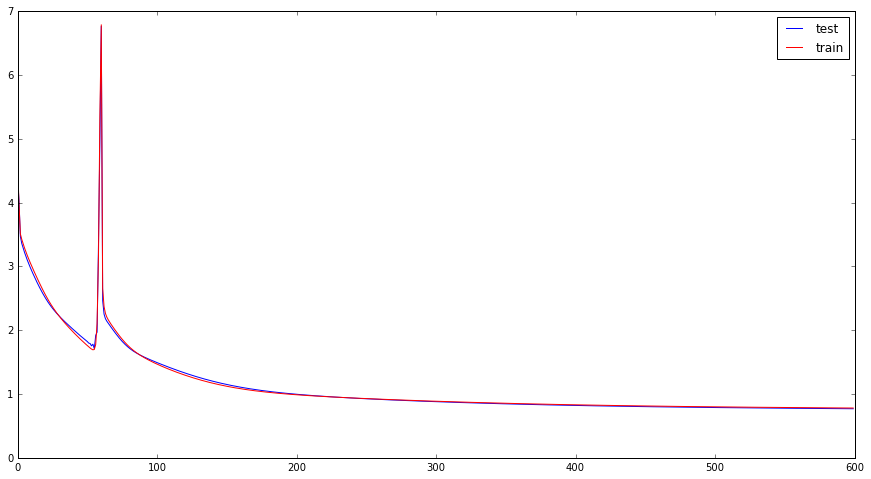

In [107]:
plt.figure(figsize = (15,8))
plt.plot(test_error, 'b', label = "test");
plt.plot(train_error, 'r',label = "train");
plt.legend();
plt.show();

In [108]:
print 'final train and test error = ', train_error[-1], test_error[-1]
print 'b = ', b
print 'w = '
print w
print 'v = '
print v

final train and test error =  0.780371620585 0.769223245936
b =  0.0193309598063
w = 
[  1.40638695e-01   2.26249292e-03  -1.90582219e-04   3.45567603e-02
  -3.78238653e-03   1.05869938e-01   2.91614369e-03   1.40280192e-02
   5.97413198e-02   8.56276747e-03   2.11660504e-01]
v = 
[[-0.02393709  0.02340671 -0.05853038  0.05186878  0.04344224]
 [-0.02011465  0.02124659  0.00061197 -0.03572728  0.00725958]
 [ 0.011071    0.01247243  0.01028587  0.03547971 -0.00609078]
 [-0.0264474   0.02889734 -0.01131283  0.00867604  0.00272095]
 [ 0.02924829  0.00388548 -0.02062076 -0.00555628  0.0117368 ]
 [ 0.01828017 -0.00841047  0.01346694 -0.00423067 -0.02953166]
 [-0.01652961 -0.01489029 -0.009362   -0.01762477  0.00514811]
 [-0.02044416 -0.01606401 -0.01789154 -0.02002195  0.02691063]
 [ 0.0163002   0.01512869 -0.03280114  0.03307607  0.01757553]
 [ 0.01014374  0.06069201 -0.01932828  0.01049423  0.01326326]
 [-0.03232395  0.01471409 -0.07408533  0.04764992  0.05389799]]


##In-class coding
1.  Modify the code above to minimize mean absolute error instead of mean squared error. 

##Homework problems
1  Implement backtracking line search to improve gradient descent behavior

2  Suppose you're given a classification problem.  Suppose y takes values +/- 1.0 and call the prediction function f(x).  Produce the code that takes the gradients of the prediction function wrt to b, w and v (named bGrad, wGrad and vGrad in the code above) and calculates the loss function gradients for logistic loss ($\frac{1}{ln\,2}ln(1\,+\,e^{-y\,f(x)})$)

3  With the same suppositions as in 2, produce the code for hinge loss function ($max(0.0, 1\,-\,y\,f(x))$). 

In [19]:
print xTe[0:10]

[[  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00]
 [  1.12000000e+01   2.80000000e-01   5.60000000e-01   1.90000000e+00
    7.50000000e-02   1.70000000e+01   6.00000000e+01   9.98000000e-01
    3.16000000e+00   5.80000000e-01   9.80000000e+00]
 [  7.90000000e+00   6.00000000e-01   6.00000000e-02   1.60000000e+00
    6.90000000e-02   1.50000000e+01   5.90000000e+01   9.96400000e-01
    3.30000000e+00   4.60000000e-01   9.40000000e+00]
 [  7.50000000e+00   5.00000000e-01   3.60000000e-01   6.10000000e+00
    7.10000000e-02   1.70000000e+01   1.02000000e+02   9.97800000e-01
    3.35000000e+00   8.00000000e-01   1.05000000e+01]
 [  5.60000000e+00   6.15000000e-01   0.00000000e+00   1.60000000e+00
    8.90000000e-02   1.60000000e+01   5.90000000e+01   9.94300000e-01
    3.58000000e+00   5.20000000e-01   9.90000000e+00]
 [  8.90000000e+00   6.2000000